In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [5]:
raw_data = pd.read_csv("./input/data_collection.csv")
raw_data.head()

,ID,column_1,column_2,column_3,column_4,column_5,column_6,column_7,column_8,column_9,...,column_32,column_33,column_34,column_35,column_36,column_37,column_38,column_39,column_40,sugar_price
0,1,35.940913,73.664852,36.032001,37.547395,0.012069,0.204383,"1,650.6000",37.692459,39.690071,...,35.209930,37.185527,27.295344,40.151343,36.863736,37.723302,-45.676536,29.597220,28.914456,26.083441
1,2,35.444034,72.893853,35.533862,37.028305,0.012069,0.204383,"1,616.3000",37.171364,39.141360,...,34.723156,36.671441,26.917988,39.596255,36.354098,37.201781,-45.001291,29.387656,28.743080,25.058946
2,3,37.058890,75.399594,37.152812,38.715343,0.012069,0.204383,"1,615.5000",38.864920,40.924669,...,36.305169,38.342219,28.144392,41.400290,38.010418,38.896722,-47.195833,30.068740,29.300050,26.082431
3,4,36.354978,74.307348,36.447116,37.979967,0.012069,0.204383,"1,620.4000",38.126703,40.147329,...,35.615573,37.613931,27.609805,40.613915,37.288432,38.157901,-46.239237,29.771857,29.057268,26.076653
4,5,34.298452,71.116277,34.385377,35.831518,0.012069,0.204383,"1,656.0000",35.969954,37.876277,...,33.600873,35.486188,26.047975,38.316469,35.179102,35.999387,-43.444479,28.904494,28.347965,24.041001


In [6]:
raw_data.shape

(2652, 42)

In [7]:
#Delete Null Contained Column
NullCol = raw_data.columns[raw_data.isnull().any()]
print("Null Col:{}".format(NullCol))
data = raw_data.drop(NullCol, axis = 1)
data.isnull().sum()

Null Col:Index(['column_7', 'column_14', 'column_15', 'column_31'], dtype='object')


ID             0
column_1       0
 column_2      0
column_3       0
column_4       0
column_5       0
column_6       0
column_8       0
column_9       0
column_10      0
column_11      0
column_12      0
column_13      0
column_16      0
column_17      0
column_18      0
column_19      0
column_20      0
column_21      0
column_22      0
column_23      0
column_24      0
column_25      0
column_26      0
column_27      0
column_28      0
column_29      0
column_30      0
column_32      0
column_33      0
column_34      0
column_35      0
column_36      0
column_37      0
column_38      0
column_39      0
column_40      0
sugar_price    0
dtype: int64

In [8]:
#Covert Object to poitive float
def cleanObject(value):
  if isinstance(value, str):
    value = value.strip()
    value = value.replace('(', '').replace(')', '')
    return abs(float(value.replace(',', '')))
  else:
    return abs(value)

for x in data.columns :
    data[x] = data[x].apply(cleanObject)
data1 = data.astype(float)
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2652 entries, 0 to 2651
Data columns (total 38 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           2652 non-null   float64
 1   column_1     2652 non-null   float64
 2    column_2    2652 non-null   float64
 3   column_3     2652 non-null   float64
 4   column_4     2652 non-null   float64
 5   column_5     2652 non-null   float64
 6   column_6     2652 non-null   float64
 7   column_8     2652 non-null   float64
 8   column_9     2652 non-null   float64
 9   column_10    2652 non-null   float64
 10  column_11    2652 non-null   float64
 11  column_12    2652 non-null   float64
 12  column_13    2652 non-null   float64
 13  column_16    2652 non-null   float64
 14  column_17    2652 non-null   float64
 15  column_18    2652 non-null   float64
 16  column_19    2652 non-null   float64
 17  column_20    2652 non-null   float64
 18  column_21    2652 non-null   float64
 19  column

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: >

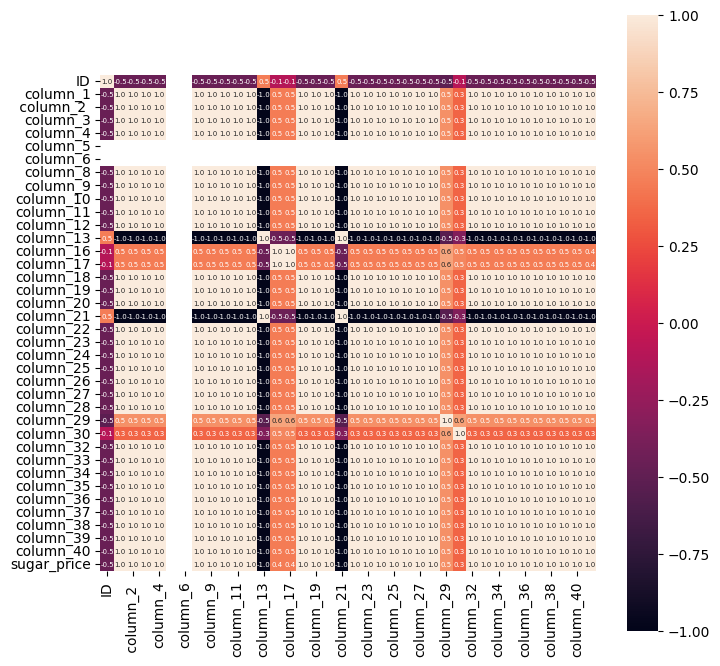

In [10]:
corr = data1.corr()
plt.figure(figsize = (8,8))
sns.heatmap(corr, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':5})

C:\Users\ASUS\AppData\Local\Temp\ipykernel_41192\518691878.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


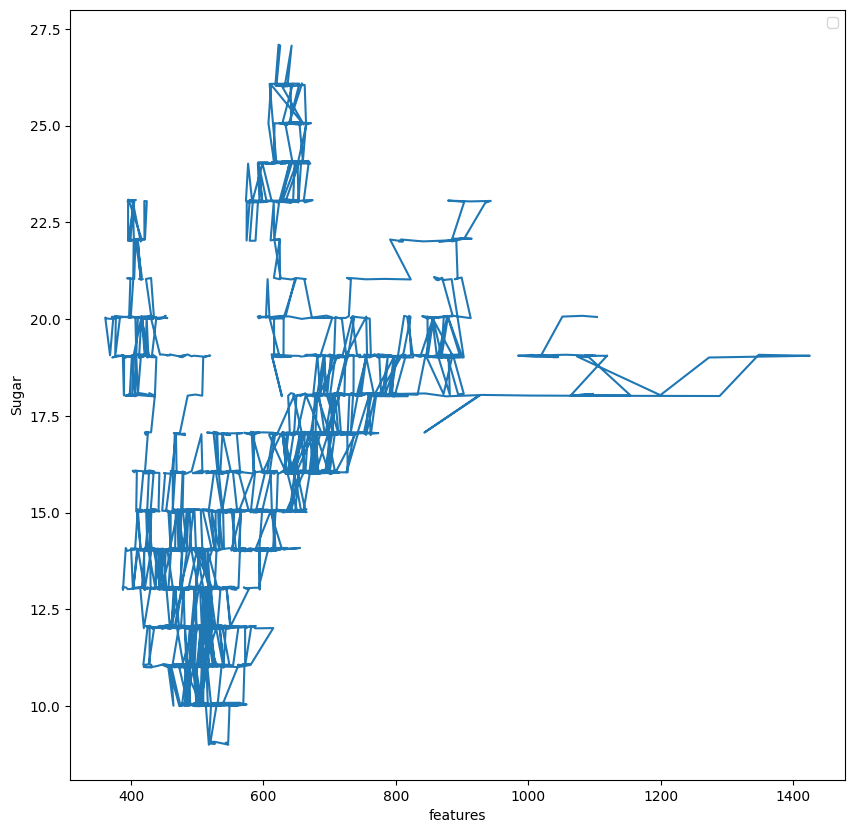

In [11]:
y_axis = data1['sugar_price']
#for col in data.columns[:-1]:
plt.figure(figsize = (10,10))
plt.plot(data1['column_16'], y_axis)
plt.ylabel('Sugar')
plt.xlabel('features')
plt.legend()
plt.show()

In [12]:
#remove col that has small corr
targetcorr = corr['sugar_price']
dropCol = targetcorr[(targetcorr > -0.6) & (targetcorr < 0.6)].index #threshold
print(targetcorr)
print("===========================================\n")
print(dropCol)

ID            -0.455104
column_1       0.996945
 column_2      0.996945
column_3       0.996945
column_4       0.996945
column_5            NaN
column_6            NaN
column_8       0.996945
column_9       0.996945
column_10      0.996945
column_11      0.996945
column_12      0.996945
column_13     -0.996945
column_16      0.448164
column_17      0.448164
column_18      0.996945
column_19      0.996945
column_20      0.996945
column_21     -0.996945
column_22      0.996945
column_23      0.996945
column_24      0.996945
column_25      0.996945
column_26      0.996945
column_27      0.996945
column_28      0.996945
column_29      0.546554
column_30      0.348124
column_32      0.996945
column_33      0.996945
column_34      0.996945
column_35      0.996945
column_36      0.996945
column_37      0.996945
column_38      0.996945
column_39      0.996945
column_40      0.996945
sugar_price    1.000000
Name: sugar_price, dtype: float64

Index(['ID', 'column_16', 'column_17', 'column_29', '

In [13]:
CleanedDataID = data1.drop(columns=dropCol.difference(['ID'])) 
CleanedDataID = CleanedDataID.drop(columns = ['column_5','column_6'], axis = 1) #remove NaN
CleanedDataID.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2652 entries, 0 to 2651
Data columns (total 32 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           2652 non-null   float64
 1   column_1     2652 non-null   float64
 2    column_2    2652 non-null   float64
 3   column_3     2652 non-null   float64
 4   column_4     2652 non-null   float64
 5   column_8     2652 non-null   float64
 6   column_9     2652 non-null   float64
 7   column_10    2652 non-null   float64
 8   column_11    2652 non-null   float64
 9   column_12    2652 non-null   float64
 10  column_13    2652 non-null   float64
 11  column_18    2652 non-null   float64
 12  column_19    2652 non-null   float64
 13  column_20    2652 non-null   float64
 14  column_21    2652 non-null   float64
 15  column_22    2652 non-null   float64
 16  column_23    2652 non-null   float64
 17  column_24    2652 non-null   float64
 18  column_25    2652 non-null   float64
 19  column

In [14]:
CleanedData = CleanedDataID.drop(columns = ['ID'], axis = 1)
CleanedData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2652 entries, 0 to 2651
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   column_1     2652 non-null   float64
 1    column_2    2652 non-null   float64
 2   column_3     2652 non-null   float64
 3   column_4     2652 non-null   float64
 4   column_8     2652 non-null   float64
 5   column_9     2652 non-null   float64
 6   column_10    2652 non-null   float64
 7   column_11    2652 non-null   float64
 8   column_12    2652 non-null   float64
 9   column_13    2652 non-null   float64
 10  column_18    2652 non-null   float64
 11  column_19    2652 non-null   float64
 12  column_20    2652 non-null   float64
 13  column_21    2652 non-null   float64
 14  column_22    2652 non-null   float64
 15  column_23    2652 non-null   float64
 16  column_24    2652 non-null   float64
 17  column_25    2652 non-null   float64
 18  column_26    2652 non-null   float64
 19  column

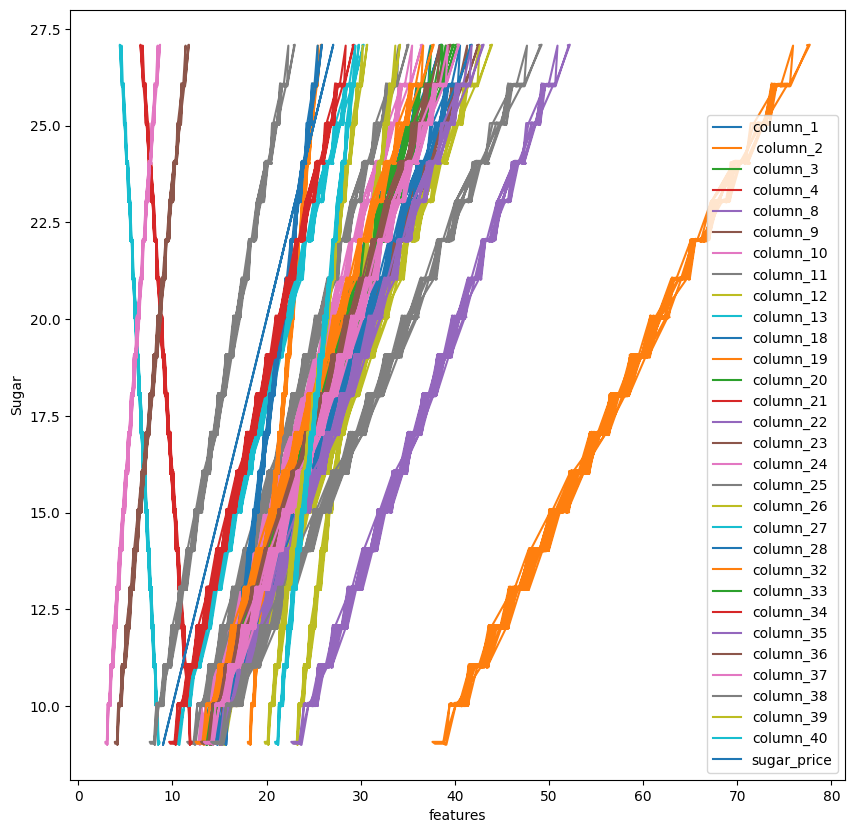

In [15]:
y_axis = CleanedData['sugar_price']
#for col in data.columns[:-1]:
plt.figure(figsize = (10,10))
for x in CleanedData.columns:
    plt.plot(data1[x], y_axis, label = x)
plt.ylabel('Sugar')
plt.xlabel('features')
plt.legend()
plt.show()

🚩 
Current Data
- raw_data = raw
- data = remove Null Data Column
- data_1 = Clean Data Type(Object -> Float, abs(data))
- ClenedDataID = Relation Features Only threshold +- 0.6 (with ID)
- CleanedData = No ID


In [16]:
CleanedData.columns = CleanedData.columns.str.strip()

In [17]:
CleanedDataID.columns = CleanedDataID.columns.str.strip()
CleanedDataID.isnull().sum()

ID             0
column_1       0
column_2       0
column_3       0
column_4       0
column_8       0
column_9       0
column_10      0
column_11      0
column_12      0
column_13      0
column_18      0
column_19      0
column_20      0
column_21      0
column_22      0
column_23      0
column_24      0
column_25      0
column_26      0
column_27      0
column_28      0
column_32      0
column_33      0
column_34      0
column_35      0
column_36      0
column_37      0
column_38      0
column_39      0
column_40      0
sugar_price    0
dtype: int64

In [18]:
features = list(CleanedDataID)[1:-1]
features

['column_1',
 'column_2',
 'column_3',
 'column_4',
 'column_8',
 'column_9',
 'column_10',
 'column_11',
 'column_12',
 'column_13',
 'column_18',
 'column_19',
 'column_20',
 'column_21',
 'column_22',
 'column_23',
 'column_24',
 'column_25',
 'column_26',
 'column_27',
 'column_28',
 'column_32',
 'column_33',
 'column_34',
 'column_35',
 'column_36',
 'column_37',
 'column_38',
 'column_39',
 'column_40']

In [19]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split

In [20]:

X = CleanedData[features].to_numpy()
y = CleanedData['sugar_price'].to_numpy()

In [21]:
#Scaled
scaler_X = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)
scaler_y = MinMaxScaler()
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1)).flatten()

In [22]:
def create_sequences_with_step_size(X, y, seq_length, step_size):
    X_seq, y_seq = [], []
    for i in range(len(X) - seq_length - step_size + 1):
        X_seq.append(X[i:i + seq_length])
        y_seq.append(y[i + seq_length:i + seq_length + step_size])
    return np.array(X_seq), np.array(y_seq)
seq_length = 100
step_size = 1
X_seq, y_seq = create_sequences_with_step_size(X_scaled, y_scaled, seq_length, step_size)
X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, shuffle=False)

In [23]:
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2]),return_sequences = True))
model.add(LSTM(32, activation='relu', return_sequences = False))
model.add(Dropout(0.1))
model.add(Dense(step_size))
model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 64)           24320     
                                                                 
 lstm_1 (LSTM)               (None, 32)                12416     
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 36769 (143.63 KB)
Trainable params: 36769 (143.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [24]:
history = model.fit(X_train, y_train, epochs=30, batch_size=12, validation_split=0.1, verbose=1)

Epoch 1/30
153/153 [==============================] - 15s 74ms/step - loss: 0.0080 - val_loss: 0.0012
Epoch 2/30
153/153 [==============================] - 11s 70ms/step - loss: 0.0035 - val_loss: 0.0010
Epoch 3/30
153/153 [==============================] - 11s 70ms/step - loss: 0.0029 - val_loss: 8.8091e-04
Epoch 4/30
153/153 [==============================] - 11s 70ms/step - loss: 0.0027 - val_loss: 0.0010
Epoch 5/30
153/153 [==============================] - 11s 70ms/step - loss: 0.0025 - val_loss: 0.0010
Epoch 6/30
153/153 [==============================] - 11s 72ms/step - loss: 0.0021 - val_loss: 7.7092e-04
Epoch 7/30
153/153 [==============================] - 12s 81ms/step - loss: 0.0019 - val_loss: 5.8431e-04
Epoch 8/30
153/153 [==============================] - 13s 82ms/step - loss: 0.0017 - val_loss: 5.8714e-04
Epoch 9/30
153/153 [==============================] - 12s 79ms/step - loss: 0.0018 - val_loss: 5.2078e-04
Epoch 10/30
153/153 [==============================] - 11s 73m

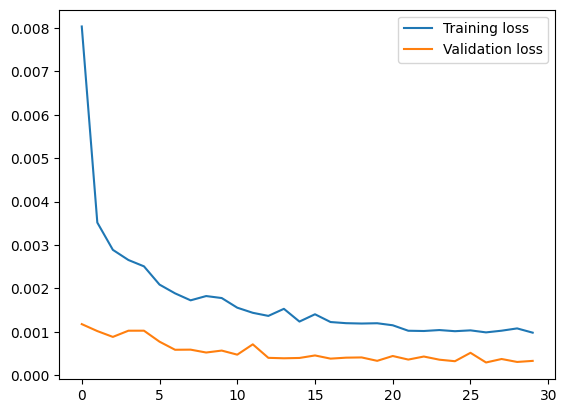

In [25]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

In [26]:
def forecast_steps_by_step(model, X_last, step_size, total_steps, scaler_y):
    predictions = []
    X_current = X_last.copy()
    
    for _ in range(0, total_steps, step_size):
        # Predict the next step_size days
        next_values_scaled = model.predict(X_current[np.newaxis, :, :])
        next_values = scaler_y.inverse_transform(next_values_scaled)[0]
        
        # Append predictions
        predictions.extend(next_values)
        
        # Update the sequence for the next prediction
        new_sequence = np.roll(X_current, shift=-step_size, axis=0)
        new_sequence[-step_size:] = next_values_scaled.flatten().reshape(step_size, -1)
        X_current = new_sequence
    
    return predictions

1/1 [==============================] - 0s 47ms/step


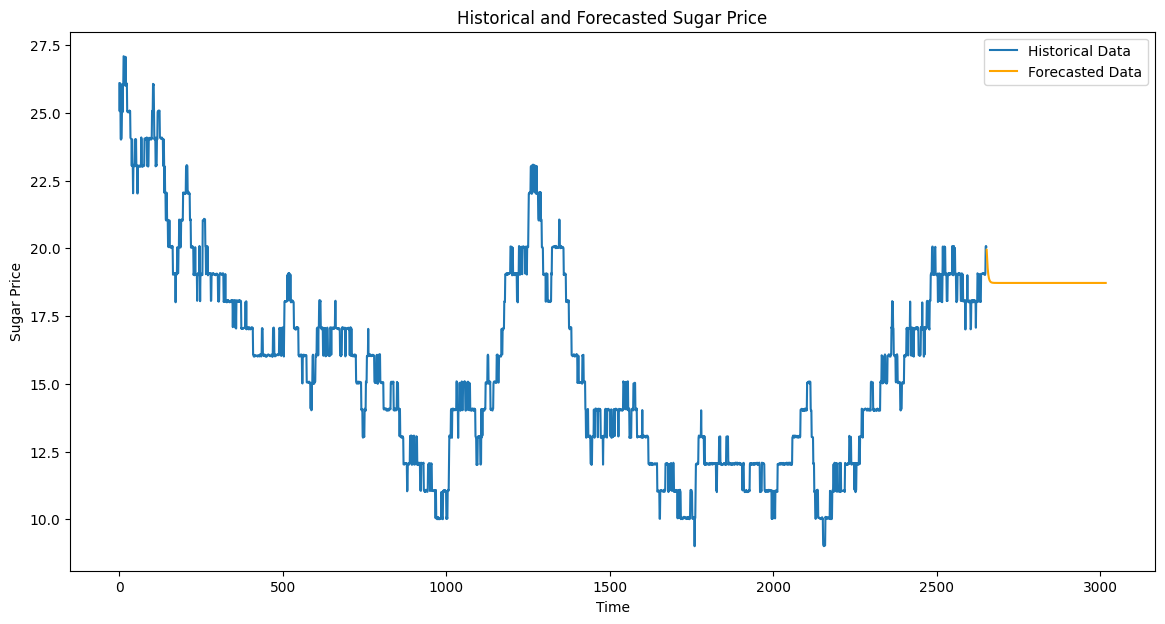

In [27]:
X_last = X_scaled[-seq_length:]

forecast = forecast_steps_by_step(model, X_last, step_size, total_steps=365, scaler_y=scaler_y)
historical_length = len(CleanedData)

forecast_start_index = historical_length
forecast_end_index = historical_length + 365

# Plotting the historical and forecasted data
plt.figure(figsize=(14, 7))
plt.plot(range(historical_length), CleanedData['sugar_price'], label='Historical Data')
plt.plot(range(forecast_start_index, forecast_end_index), forecast[:365], label='Forecasted Data', color='orange')
plt.title('Historical and Forecasted Sugar Price')
plt.xlabel('Time')
plt.ylabel('Sugar Price')
plt.legend()
plt.show()

In [28]:
ID = []
for i in range(365):
    ID.append(i+1)

In [29]:
dict = {'ID': ID, 'Prediction': forecast[:365]}
df = pd.DataFrame(dict)
df.tail()

,ID,Prediction
360,361,18.720839
361,362,18.720839
362,363,18.720839
363,364,18.720839
364,365,18.720839


In [30]:
df.to_csv('submission.csv',index = False)